# Using Google Colab

Read through the **Getting started** paragraph in the [official documentation](https://colab.research.google.com/). You may also want to take a look into the **More resources** section.

To add a new code block or text block, use the buttons in the menus above or hover your mouse between two blocks, where more buttons should appear.

To execute all code blocks within this document, select `Runtime -> Run all`. When you submit your solution, this should run without throwing an error.

Sometimes, previously defined variables cause trouble in later executions. If this is the case, you can select `Runtime -> Restart runtime` to restart the runtime and erase all previous definitions.

# Work Distribution

***Your answer here. (MANDATORY)***

# Initialisation

This section contains code that is later used to test, measure and plot your implementations. You need to run it once to initialise it.

⇩ Click here to initialise the code.

In [1]:
# tests

import random

def shuffle(list):
  random.shuffle(list)
  return list

tests = [(name, unsorted, sorted(unsorted)) for (name, unsorted) in [
    ("empty list", []),
    ("one element", [42]),
    ("digits ascending", list(range(10))),
    ("digits descending", list(reversed(range(10)))),
    ("digits shuffled", shuffle(list(range(10)))),
    ("all entries the same", [42 for _ in range(10)]),
    ("some duplicates", shuffle(list(range(10)) + list(range(5)))),
    ("negative numbers", shuffle([x - 10 for x in list(range(20))])),
    ("float numbers", shuffle([x * 3.14 for x in list(range(20))])),
    ("mixed numbers", shuffle([x * 3.14 for x in list(range(10))] + list(range(10)))),
    *[("random numbers " + str(idx) + " (small)", [random.randrange(1000) for _ in range(20)]) for idx in range(0, 5)],
    *[("random numbers " + str(idx) + " (medium)", [random.randrange(10000) for _ in range(200)]) for idx in range(5, 10)],
    *[("random numbers " + str(idx) + " (large)", [random.randrange(100000) for _ in range(2000)]) for idx in range(10, 15)],
]]

def run_tests(fun):
  print("executing all tests on %s..." % (fun.__name__))
  ok = 0
  err = 0
  for name, input, expected in tests:
    copy = input.copy()
    try:
      fun(copy)
    except Exception as e:
      print("Test '%s' raised an exception!\n  input:     %s\n  expected:  %s\n  exception: %s" % (name, input, expected, e))
      raise e
    else:
      if copy == expected:
        print("Test '%s' passed!" % (name))
        ok += 1
      else:
        print("Test '%s' failed!\n  input:     %s\n  output:    %s\n  expected:  %s" % (name, input, copy, expected))
        err +=1
  print("%s (summary): %d/%d OK, %d/%d ERROR" % (fun.__name__, ok, len(tests), err, len(tests)))

# runtime parameters

num_samples = 20
sizes = [200 * i for i in range(1, 10)]

# runtime plot

import matplotlib.pyplot as plt

def plot_runtime(funs, funs_checkered=None):
  for fun in funs:
    plt.plot(sizes, runtimeDict[fun.__name__], label=fun.__name__)
  if funs_checkered:
    plt.gca().set_prop_cycle(None)
    for fun in funs_checkered:
      plt.plot(sizes, runtimeDict[fun.__name__], '--', label=fun.__name__)

  plt.xlabel('List Length')
  plt.ylabel('Runtime (seconds)')
  plt.title('Runtime vs List Length')

  plt.legend()
  plt.show()

# runtime measurement

import time

runtimeDict = {}
def measure_runtime(funs):
  inputs = [[[random.random() for _ in range(size)] for _ in range(num_samples)] for size in sizes]

  for fun in funs:
    runtimes = []
    for batch in inputs:
      batch_rt = []
      for input in batch:
        copy = input.copy()
        start_time = time.time()
        fun(copy)
        end_time = time.time()
        batch_rt.append(end_time - start_time)
      runtimes.append(min(batch_rt))
    runtimeDict[fun.__name__] = runtimes

# Sorting Algorithms

In this exercise, you are going to implement the *Insertion Sort*, *Selection Sort* and *Sink Sort* algorithms.

- Each of your sorting functions should accept an unsorted list of numbers and sort it (in place). Of course, you are allowed to add as many helper functions as needed.
- Note that arrays (or lists) in the textbook are indexed from 1, whereas in Python (and most other programming languages) they are indexed from 0.
- Your implementation should have a good performance with respect to the asymptotic complexity found in the literature.

At the bottom of each code block, there is a function call to test your algorithm implementation. Run it to check if your implementation is correct.

Below the algorithms in this document, there is a code block that reports runtime statistics. Furthermore, at the end of the document, there are a couple of questions you should answer.

### 1. Insertion Sort (2 points)

Implement Insertion Sort as seen in the lecture.

In [2]:
def insertionsort(lst):

    for i in range(1,len(lst)):
        if lst[i] > lst[i-1]:  # if element is already sorted
            continue
        else:
            idx = i
            while idx>0 and lst[idx]<lst[idx-1]:
                temp = lst[idx-1]
                lst[idx-1] = lst[idx]
                lst[idx] = temp
                idx -=1

    return lst

In [3]:
lst = [9,8,7,6,5,4,3,2,1,0]
insertionsort(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
run_tests(insertionsort)

executing all tests on insertionsort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
insertionsort (summary): 25/25 OK, 0/25 ERRO

### 2. Selection Sort (2 points)

Implement Selection Sort, which is a sorting algorithm that proceeds as follows:
- Throughout the execution, the array is divided into a sorted lower part and an unsorted upper
part.
- Initially, the sorted lower part is empty. Upon termination, the sorted lower part spans the
whole array.
- In each iteration of the algorithm:
 1. The algorithm searches for the minimal element of the unsorted upper part.
 2. This minimal element is swapped with the first element of the unsorted upper part of
the array.
 3. The boundary between the sorted lower part and the unsorted upper part is raised by
one to include the newly sorted element.

In [5]:
def selectionsort(lst):
    # Initialize
    boundary_idx = 0

    # Loop over all elements
    for i in range(1,len(lst)):
        
        # Find minimal element in unsorted upper part
        mini = lst[boundary_idx] # initialize with minimal element is first element in upper unsorted
        for j in range(boundary_idx, len(lst)):
            if lst[j] <= mini:
                mini = lst[j]
                mini_idx = j

        # Swap minimal element with beginning element of unsorted upper part
        temp = lst[boundary_idx]
        lst[boundary_idx] = mini
        lst[mini_idx] = temp

        # Increment boundary_idx
        boundary_idx += 1
    
    
    return lst

In [6]:
lst = [9,8,7,6,5,4,3,2,1,0]
selectionsort(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
run_tests(selectionsort)

executing all tests on selectionsort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
selectionsort (summary): 25/25 OK, 0/25 ERRO

### 3. Sink Sort (2 points)

Implement Sink Sort, which is a sorting algorithm that proceeds as follows:
- Compare the first and second element of the array. If they are mismatched (the second element is smaller than the first one), swap them.
- Compare the second and third element of the array and swap them if they are mismatched.
- Continue until the end of the array, i.e. the second to last element and the last element.
- If you have swapped at least one pair of elements, repeat from the beginning.

In [8]:
def sinksort(lst):
    
    # Variables
    main_loop = True
    iteration = 1
    
    # Main loop
    while main_loop:
    
        # Variable for storing if list has been updated
        swapped = 0
    
        # Loop over list
        for i in range(len(lst)-1):

            # Compare neighbouring elements of the array and swap if smaller
            if lst[i+1] < lst[i]:
                temp = lst[i]
                lst[i] = lst[i+1]
                lst[i+1] = temp

                swapped = 1
                
        # Exit main loop if no changes during full iteration
        if swapped == 0:
            main_loop = False
            
        # Track iterations
        iteration +=1
        
    return lst

In [9]:
lst = [9,8,7,6,5,4,3,2,1,0]
sinksort(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
run_tests(sinksort)

executing all tests on sinksort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
sinksort (summary): 25/25 OK, 0/25 ERROR


### 4. Runtime Comparisons (2 points)

The following code will measure the runtime of your algorithm implementations.

Compare the reported runtimes. What do you observe? How do you explain your observations?

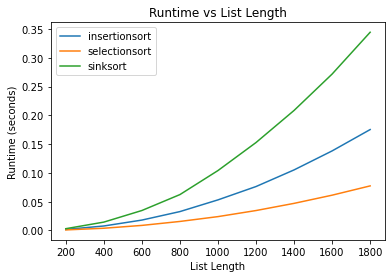

In [11]:
measure_runtime([insertionsort, selectionsort, sinksort])
plot_runtime([insertionsort, selectionsort, sinksort])

**Answer:**

Insertionsort:
@800 = 0.03s, @1600 = 0.13s:        2x length -> 4.33x time

selectionsort:
@800 = 0.0125s, @1600 = 0.055s:     2x length -> 4,4x time

sinksort:
@800 = 0.06125s, @1600 = 0.26125s:  2x length -> 4.26x time

All algortihms scale as approx: O(n^2).

But some are faster than others because it is a more efficient algorithm. We have a smaller constant in front of the terms in the function: t(n) = A*n^2 + B*n + C

### 5. Modified Sink Sort (1 point)

Have another look at the description of Sink Sort. Is it really necessary to go through the whole array in each iteration? Suggest an optimisation, implement it and compare the runtime to the unmodified version.



In [12]:
def mod_sinksort(lst):
    
    # Variables
    main_loop = True
    iteration = 1
    
    # Main loop
    while main_loop:
    
        # Variable for storing if list has been updated
        swapped = 0
    
        # Loop over list
        for i in range(len(lst)-iteration):                                   ###### MADE CHANGE HERE

            # Compare neighbouring elements of the array and swap if smaller
            if lst[i+1] < lst[i]:
                temp = lst[i]
                lst[i] = lst[i+1]
                lst[i+1] = temp

                swapped = 1
        
        # Exit main loop if no changes during full iteration
        if swapped == 0:
            main_loop = False
            
        # Track iterations
        iteration +=1
        
    return lst

In [13]:
lst = [9,8,7,6,5,4,3,2,1,0]
mod_sinksort(lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [14]:
run_tests(mod_sinksort)

executing all tests on mod_sinksort...
Test 'empty list' passed!
Test 'one element' passed!
Test 'digits ascending' passed!
Test 'digits descending' passed!
Test 'digits shuffled' passed!
Test 'all entries the same' passed!
Test 'some duplicates' passed!
Test 'negative numbers' passed!
Test 'float numbers' passed!
Test 'mixed numbers' passed!
Test 'random numbers 0 (small)' passed!
Test 'random numbers 1 (small)' passed!
Test 'random numbers 2 (small)' passed!
Test 'random numbers 3 (small)' passed!
Test 'random numbers 4 (small)' passed!
Test 'random numbers 5 (medium)' passed!
Test 'random numbers 6 (medium)' passed!
Test 'random numbers 7 (medium)' passed!
Test 'random numbers 8 (medium)' passed!
Test 'random numbers 9 (medium)' passed!
Test 'random numbers 10 (large)' passed!
Test 'random numbers 11 (large)' passed!
Test 'random numbers 12 (large)' passed!
Test 'random numbers 13 (large)' passed!
Test 'random numbers 14 (large)' passed!
mod_sinksort (summary): 25/25 OK, 0/25 ERROR


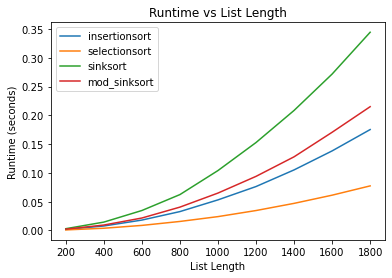

In [15]:
measure_runtime([mod_sinksort])
plot_runtime([insertionsort, selectionsort, sinksort, mod_sinksort])

**Answer:**

After each pass over the entire list, the largest element will be moved to the end of the list. This means that after each iteration we have one less element to check since we already know that the last element is the largest one.

### 6. Runtime approximations (1 point - hard question)

Using the statistics from the tests, for each algorithm, find a function `f(n)` which *approximately* describes the runtime of the algorithm in *seconds*, depending on the input size `n`. For example, if Insertion Sort takes 5 milliseconds to sort a list of 1000 numbers and 20 milliseconds to sort a list of 2000 numbers, then it should be that `f_insertion(1000)≈0.005` and `f_insertion(2000)≈0.020`.

It is possible to solve this by trial-and-error, but how would you get the answer by a simple calculation?

### Make timings

In [16]:
import random
import time

n = [4000,6000,9000]
timings = []

for lengths in n:
    lst = [random.randint(0, 100) for _ in range(lengths)]

    t1 = time.time()
    sorted_lst = mod_sinksort(lst)  ### Specify sorting algorithm here
    timings.append(time.time()-t1)


print(f"Elapsed time for sorting:")
for i in range(len(n)):
    print(f"n={n[i]} -->  t={timings[i]}")

Elapsed time for sorting:
n=4000 -->  t=1.135922908782959
n=6000 -->  t=2.53951096534729
n=9000 -->  t=5.792694568634033


### Functions for calculating time

In [17]:
def f_insertion(size):
    """ t(n) = A*n^2 + B*n """
    A = 5.45568*10**(-8)
    B = -6.6768*10**(-6)
    
    return A*size**2 + B**size

def f_selection(size):
    """ t(n) = A*n^2 + B*n """
    A = 1.99285*10**(-8)
    B = 0.00002405
    
    return A*size**2 + B**size

def f_sink(size):
    """ t(n) = A*n^2 + B*n """
    A = 1.03323*10**(-7)
    B = 0.0000159
    
    return A*size**2 + B**size

def f_mod_sink(size):
    """ t(n) = A*n^2 + B*n """
    A = 6.3574*10**(-8)
    B = 0.00003038
    
    return A*size**2 + B**size


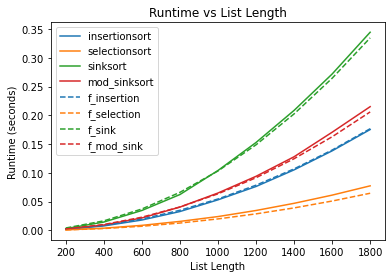

In [18]:
# plot all functions
for fun in [f_insertion, f_selection, f_sink, f_mod_sink]:
    runtimeDict[fun.__name__] = [fun(size) for size in sizes]
plot_runtime([insertionsort, selectionsort, sinksort, mod_sinksort], [f_insertion, f_selection, f_sink, f_mod_sink])

**Answer:**

We assume elapsed time for sorting can be expressed as t(n) = A*n^2 + B*n. We have two unknowns for each sorting algorithm so we make two time measurements and solve a system of equations to solve for A and B.

______________________________________________________________
**Insertion sort**

n=4000  ->  t(n)=0.8462011814117432  ->  0.8462011814117432 = A*4000^2 + B*4000

n=6000  ->  t(n)=1.923983097076416   ->  1.923983097076416 = A*6000^2 + B*6000

System of eqs gives: A=5.4583*10^-8, B=-6.833*10^-6


______________________________________________________________
**Selection sort**

t(n) = A*n^2 + B*n

n=4000  ->  t(n)=0.4150426387786865  ->  0.4150426387786865 = A*4000^2 + B*4000

n=6000  ->  t(n)=0.861706018447876   ->  0.861706018447876 = A*6000^2 + B*6000

System of eqs gives: A=1.99285*10^-8, B = 0.00002405


______________________________________________________________
**Sink sort**

t(n) = A*n^2 + B*n

n=4000  ->  t(n)=1.7167918682098389  ->  1.7167918682098389 = A*4000^2 + B*4000

n=6000  ->  t(n)=3.815063953399658   ->  3.815063953399658 = A*6000^2 + B*6000

System of eqs gives: A = 1.03323*10^-7, B=0.0000159


______________________________________________________________
**Modified Sink Sort**

t(n) = A*n^2 + B*n

n=4000  ->  t(n)=1.138725996017456 ->  1.138725996017456 = A*4000^2 + B*4000

n=6000  ->  t(n)=2.470980167388916   ->  2.470980167388916 = A*6000^2 + B*6000

System of eqs gives:  A = 6.3574*10^-8, B = 0.00003038


